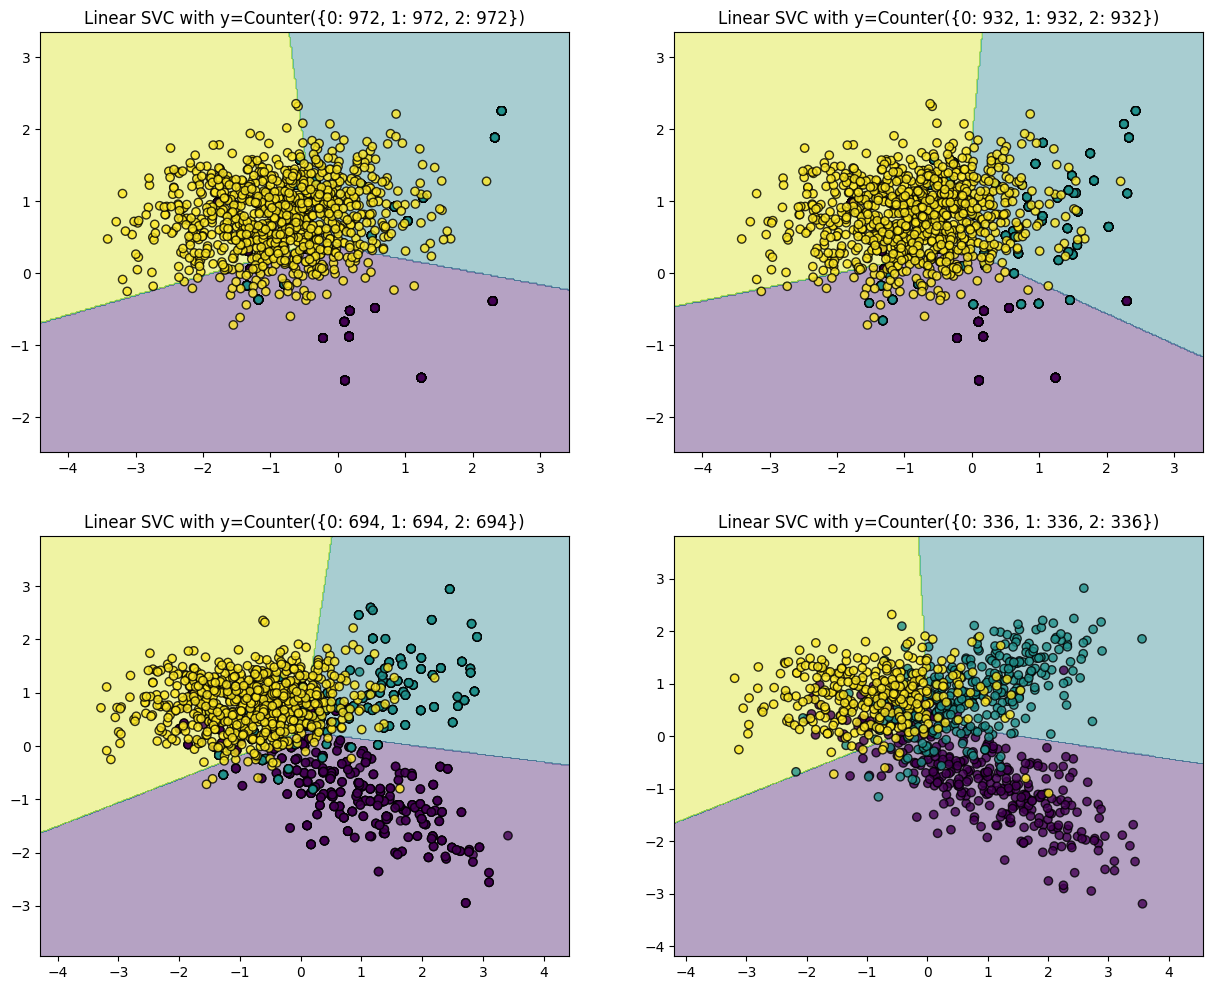

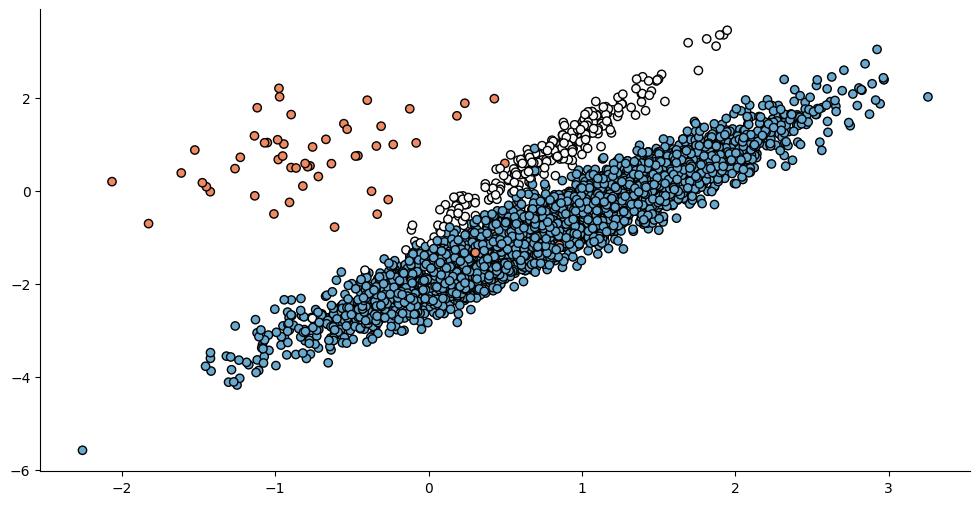

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)

    # Perform over-sampling
    ros = RandomOverSampler(random_state=0)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Perform under-sampling
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

    clf = LinearSVC().fit(X_resampled, y_resampled)
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    ax.set_title('Linear SVC with y={}'.format(Counter(y_resampled)))

# Plot the original imbalanced dataset
X_imbalanced, y_imbalanced = create_dataset(n_samples=5000, weights=[0.01, 0.05, 0.94])
colors_imbalanced = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_imbalanced]
kwarg_params_imbalanced = {'linewidth': 1, 'edgecolor': 'black'}
fig_imbalanced = plt.figure(figsize=(12, 6))
plt.scatter(X_imbalanced[:, 0], X_imbalanced[:, 1], c=colors_imbalanced, **kwarg_params_imbalanced)
sns.despine()

plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading the data from the CSV file to a pandas dataframe
loan_dataset = pd.read_csv('/content/loan_sanction_test.csv')

# Display basic information about the dataset
print(loan_dataset.info())

# Feature Engineering

# 1. Handling Missing Values
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median(), inplace=True)
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].median(), inplace=True)
loan_dataset['Credit_History'].fillna(0, inplace=True)  # Fill with a specific value

# 2. Creating New Features
loan_dataset['TotalIncome'] = loan_dataset['ApplicantIncome'] + loan_dataset['CoapplicantIncome']

# 3. Encoding Categorical Variables
loan_dataset = pd.get_dummies(loan_dataset, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# 4. Scaling Numeric Features
scaler = StandardScaler()
loan_dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome']] = scaler.fit_transform(loan_dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome']])


# Display the updated dataset
print(loan_dataset.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None
    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001015         0.186461          -0.673335   -0.426780          0.266